In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
df1 = pd.read_csv('timeseries_events.csv')
df2 = pd.read_csv('timeseries_users.csv')

In [3]:
df1.head()

,user_id,event_date
0,0,2015-02-26 00:00:00
1,0,2015-03-10 00:00:00
2,0,2015-03-30 00:00:00
3,0,2015-02-15 00:00:00
4,0,2015-02-18 00:00:00


In [4]:
df1.describe()

,user_id
count,30593.000000
mean,50.426634
std,29.903165
min,0.000000
25%,21.000000
50%,53.000000
75%,80.000000
max,96.000000


In [5]:
df2.head()

,age,gender,user_id
0,51,f,0
1,49,f,1
2,35,m,2
3,63,m,3
4,27,f,4


In [6]:
male30 = df2[(df2.gender =='m') & (df2.age>=30)].reset_index(drop=True)
male30.insert(loc=3,column='count',value=0)
male30.head()

,age,gender,user_id,count
0,35,m,2,0
1,63,m,3,0
2,45,m,12,0
3,51,m,17,0
4,41,m,21,0


In [7]:
for id in df1['user_id']:
    if id in male30['user_id']:
        row_number = male30.index.get_loc(id)
        temp = male30.iloc[row_number, 3] +1
        male30.set_value(index=row_number, col='count', value= temp)

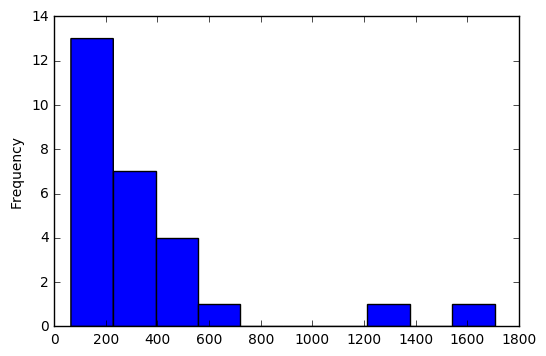

In [8]:
# histogram of events of male>30
%matplotlib inline
male30['count'].plot(kind='hist')

In [9]:
df1['user_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96])

In [10]:
for i in range(len(df1)):
    df1.iloc[i,1] = datetime.strptime(df1.iloc[i,1],"%Y-%m-%d %H:%M:%S")

In [11]:
sorted_df1 = df1.sort_values(by=['user_id','event_date'])
sorted_df1.head()

,user_id,event_date
38,0,2015-01-15 00:00:00
144,0,2015-01-15 00:00:00
72,0,2015-01-16 00:00:00
129,0,2015-01-16 00:00:00
6,0,2015-01-17 00:00:00


In [12]:
# calculate intervals in term of days for each user 
for i in range(1,len(sorted_df1)):
    if sorted_df1.iloc[i-1,0] == sorted_df1.iloc[i,0]:
        sorted_df1.set_value(index=i, col = 'intervals', value = (sorted_df1.iloc[i,1] - sorted_df1.iloc[i-1,1]).days)

In [13]:
sorted_df1.head()

,user_id,event_date,intervals
38,0,2015-01-15 00:00:00,1.0
144,0,2015-01-15 00:00:00,1.0
72,0,2015-01-16 00:00:00,1.0
129,0,2015-01-16 00:00:00,0.0
6,0,2015-01-17 00:00:00,0.0


user_id
0     Axes(0.125,0.125;0.775x0.775)
1     Axes(0.125,0.125;0.775x0.775)
2     Axes(0.125,0.125;0.775x0.775)
3     Axes(0.125,0.125;0.775x0.775)
4     Axes(0.125,0.125;0.775x0.775)
5     Axes(0.125,0.125;0.775x0.775)
6     Axes(0.125,0.125;0.775x0.775)
7     Axes(0.125,0.125;0.775x0.775)
8     Axes(0.125,0.125;0.775x0.775)
9     Axes(0.125,0.125;0.775x0.775)
10    Axes(0.125,0.125;0.775x0.775)
11    Axes(0.125,0.125;0.775x0.775)
12    Axes(0.125,0.125;0.775x0.775)
13    Axes(0.125,0.125;0.775x0.775)
14    Axes(0.125,0.125;0.775x0.775)
15    Axes(0.125,0.125;0.775x0.775)
16    Axes(0.125,0.125;0.775x0.775)
17    Axes(0.125,0.125;0.775x0.775)
18    Axes(0.125,0.125;0.775x0.775)
19    Axes(0.125,0.125;0.775x0.775)
20    Axes(0.125,0.125;0.775x0.775)
21    Axes(0.125,0.125;0.775x0.775)
22    Axes(0.125,0.125;0.775x0.775)
23    Axes(0.125,0.125;0.775x0.775)
24    Axes(0.125,0.125;0.775x0.775)
25    Axes(0.125,0.125;0.775x0.775)
26    Axes(0.125,0.125;0.775x0.775)
27    Axes(0.125,0.1

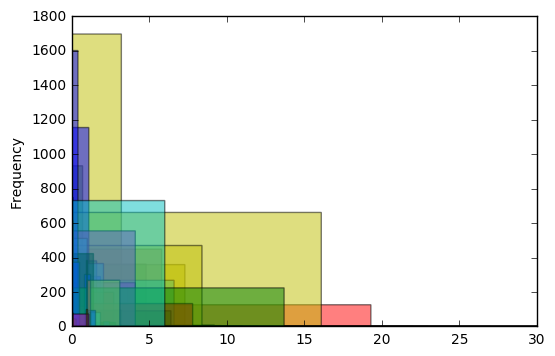

In [14]:
#histogram of intervals for all users
sorted_df1.groupby('user_id')['intervals'].plot(kind='hist',alpha=.5,xlim=[0,30])